# Auto Insurance Industry

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score,cohen_kappa_score
from sklearn.utils import resample
from pprint import pprint

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display
import statsmodels.api as sm # import API
from matplotlib.pyplot import xticks

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
py.offline.init_notebook_mode(connected=True)
pd.options.display.float_format = '{:20,.2f}'.format 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.70,0.20,0.72,10,1,-1,0,1,4,1,0,0,1,12,2,0.40,0.88,0.37,3.61,0.60,0.50,0.20,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.80,0.40,0.77,11,1,-1,0,-1,11,1,1,2,1,19,3,0.32,0.62,0.39,2.45,0.30,0.10,0.30,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.00,0.00,-1.00,7,1,-1,0,-1,14,1,1,2,1,60,1,0.32,0.64,0.35,3.32,0.50,0.70,0.10,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.90,0.20,0.58,7,1,0,0,1,11,1,1,3,1,104,1,0.37,0.54,0.29,2.00,0.60,0.90,0.10,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.70,0.60,0.84,11,1,-1,0,-1,14,1,1,2,1,82,3,0.32,0.57,0.37,2.00,0.40,0.60,0.00,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.50,0.30,0.69,10,1,-1,0,1,1,1,1,0,1,31,3,0.37,0.68,0.39,2.65,0.40,0.50,0.30,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.90,0.70,1.38,9,1,-1,0,-1,15,0,0,2,1,63,2,0.39,0.97,-1.00,3.61,0.20,0.20,0.00,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.90,0.20,0.66,7,1,-1,0,-1,1,1,1,2,1,31,3,0.40,0.60,0.40,1.73,0.40,0.00,0.30,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.90,0.40,0.70,11,1,-1,0,-1,11,1,1,2,1,101,3,0.37,0.76,0.38,3.16,0.00,0.70,0.00,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


We can see there are total 600k training data with 59 features.

## Exploratory Data Analysis:

In [4]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,"595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00","595,212.00"
mean,"743,803.56",0.04,1.90,1.36,4.42,0.42,0.41,0.39,0.26,0.16,0.19,0.00,0.00,0.01,0.00,0.01,7.30,0.66,0.12,0.15,0.61,0.44,0.55,8.30,0.83,-0.50,0.73,-0.16,6.56,0.91,0.83,1.33,0.99,62.22,2.35,0.38,0.81,0.28,3.07,0.45,0.45,0.45,2.37,1.89,7.69,3.01,9.23,2.34,8.43,5.44,1.44,2.87,7.54,0.12,0.63,0.55,0.29,0.35,0.15
std,"429,367.82",0.19,1.98,0.66,2.70,0.49,1.35,0.49,0.44,0.37,0.39,0.02,0.04,0.10,0.03,0.13,3.55,0.47,0.33,0.36,0.29,0.40,0.79,2.51,0.38,0.79,2.15,0.84,5.50,0.35,0.37,0.98,0.09,33.01,0.83,0.06,0.22,0.36,0.73,0.29,0.29,0.29,1.12,1.13,1.33,1.41,1.46,1.25,2.90,2.33,1.20,1.69,2.75,0.33,0.48,0.50,0.45,0.48,0.36
min,7.00,0.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,0.00,-1.00,0.00,-1.00,0.00,1.00,-1.00,-1.00,0.25,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"371,991.50",0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.40,0.20,0.53,7.00,1.00,-1.00,0.00,-1.00,1.00,1.00,1.00,0.00,1.00,32.00,2.00,0.32,0.67,0.33,2.83,0.20,0.20,0.20,2.00,1.00,7.00,2.00,8.00,1.00,6.00,4.00,1.00,2.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"743,547.50",0.00,1.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,1.00,0.00,0.00,0.70,0.30,0.72,7.00,1.00,-1.00,0.00,0.00,7.00,1.00,1.00,2.00,1.00,65.00,3.00,0.37,0.77,0.37,3.32,0.50,0.40,0.50,2.00,2.00,8.00,3.00,9.00,2.00,8.00,5.00,1.00,3.00,7.00,0.00,1.00,1.00,0.00,0.00,0.00
75%,"1,115,548.75",0.00,3.00,2.00,6.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,1.00,0.00,0.00,0.90,0.60,1.00,11.00,1.00,0.00,0.00,1.00,11.00,1.00,1.00,2.00,1.00,93.00,3.00,0.40,0.91,0.40,3.61,0.70,0.70,0.70,3.00,3.00,9.00,4.00,10.00,3.00,10.00,7.00,2.00,4.00,9.00,0.00,1.00,1.00,1.00,1.00,0.00
max,"1,488,027.00",1.00,7.00,4.00,11.00,1.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,13.00,1.00,1.00,1.00,0.90,1.80,4.04,11.00,1.00,1.00,9.00,1.00,17.00,1.00,1.00,4.00,2.00,104.00,3.00,1.26,3.72,0.64,3.74,0.90,0.90,0.90,5.00,6.00,10.00,9.00,12.00,7.00,25.00,19.00,10.00,13.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00


In [4]:
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))

def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))



def plot_data_pie_chat(dataframe,col) : 
    header("Stats for "+col+" Datatype Percentage Distribution")
    dataframe_group = dataframe.groupby(col).frequency.count().reset_index()
    dataframe_group.sort_values([col], axis=0,ascending=False, inplace=True)
    trace = go.Pie(labels=dataframe_group[col].tolist(), values=dataframe_group["frequency"].tolist())
    layout = go.Layout(title="Datatype Percentage Distribution")
    fig = go.Figure(data=[trace], layout=layout)    
    py.offline.iplot(fig)

def pairplot(x_axis,y_axis) :
    sns.pairplot(car_df,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()



def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color



In [11]:
def get_meta_data(dataframe) :
    """
     Method to get Meta-Data about any dataframe passed 
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), # data types of columns
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), # total elements in columns
                    'Null_Count': dataframe.isnull().sum().astype(int), # total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, # percentage of null values
                    'Unique_Values_Count': dataframe.nunique().astype(int) # number of unique values
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_variable_type(element) :
    """
     Check is columns are of Continuous or Categorical variable.
     Assumption is that if 
                 unique count < 20 then categorical 
                 unique count >= 20 and dtype = [int64 or float64] then continuous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous"
    

temp = df[:200000]
_X = temp.drop(['id','target'],axis =1)
_y=temp.target
metadata_matrix_dataframe = get_meta_data(df)
metadata_matrix_dataframe["dt_name"] =[ i.split("_")[-1] for i in metadata_matrix_dataframe.index.values]
metadata_matrix_dataframe['dt_name'] = metadata_matrix_dataframe['dt_name'].apply(lambda x : "interval" if str(x).isnumeric() else x)

Dtype = metadata_matrix_dataframe.groupby(['dt_name'])

interval_feature =Dtype.get_group("interval").index.tolist()
bin_feature = Dtype.get_group("bin").index.tolist()
cat_feature = Dtype.get_group("cat").index.tolist()

##### 1. Write at least 3 important inferences from the data above

Data is higly imblaced, target distribtion is:

0 = 96.36 %

1 = 3.64 %

data have vaiable type:

Interval = 45.6

binary =29.8

categorical = 24.6

Most of the features are uncorrelated

#### 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

0                  96.36
1                   3.64
Name: target, dtype: float64


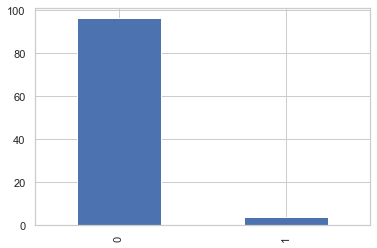

In [14]:
per = (df['target'].value_counts()/(df.shape[0]))*100  #Percentage Distribution of traget (independent variable)
print(per)
per.plot.bar();

No, target distribution is not in right proportion.

#### 3. How many categorical features are there?

In [15]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


We can see ṭhere are no Categorical features in the dataset

#### 4. How many binary features are there?

In [16]:
unique = df.nunique()
print(unique)

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          2
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


From above we can see we have 20 binary features present in dataset

#### 5. Write inferences from data on interval variables

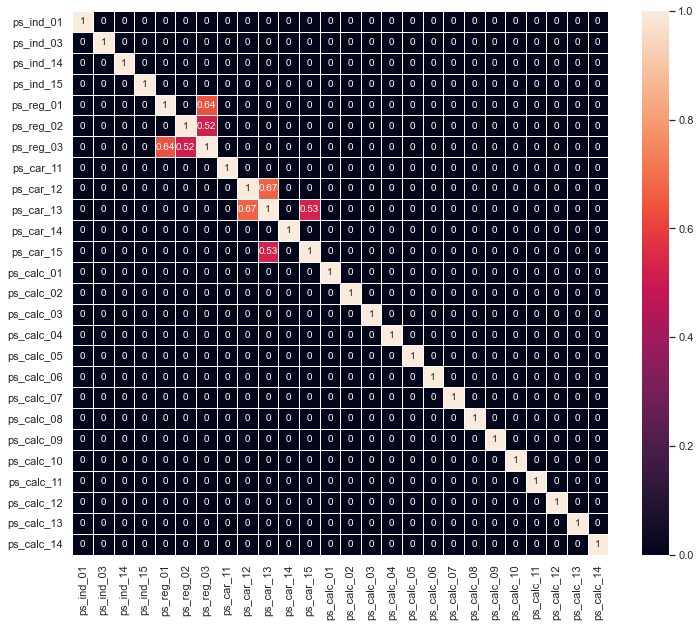

In [17]:
temp = df[interval_feature].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5,ax=ax, annot=True)
plt.show()

Almost all the features are independent, Looking at above plot only 3 features are correlated with correlation near 0.5.

#### 6. Write inferences from data on ordinal variables.

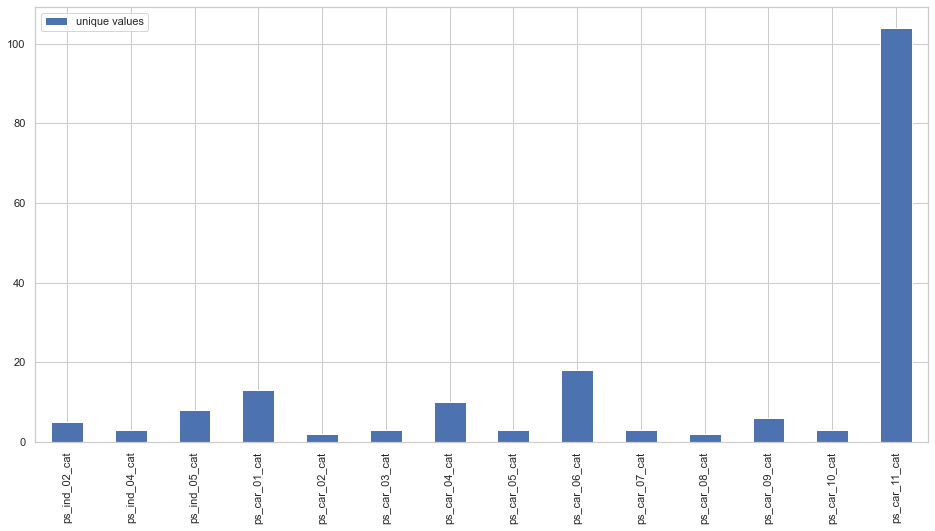

In [18]:

d ={}
for i in df[cat_feature].columns:
    d[i] = df[cat_feature][i].nunique()

pd.DataFrame(d,index=['unique values']).T.plot.bar(figsize=(16,8));

Looking at above graph only one(ps_car_11_cat) feature have unqiue values more than 20.

#### 7. Write inferences from data on binary variables.

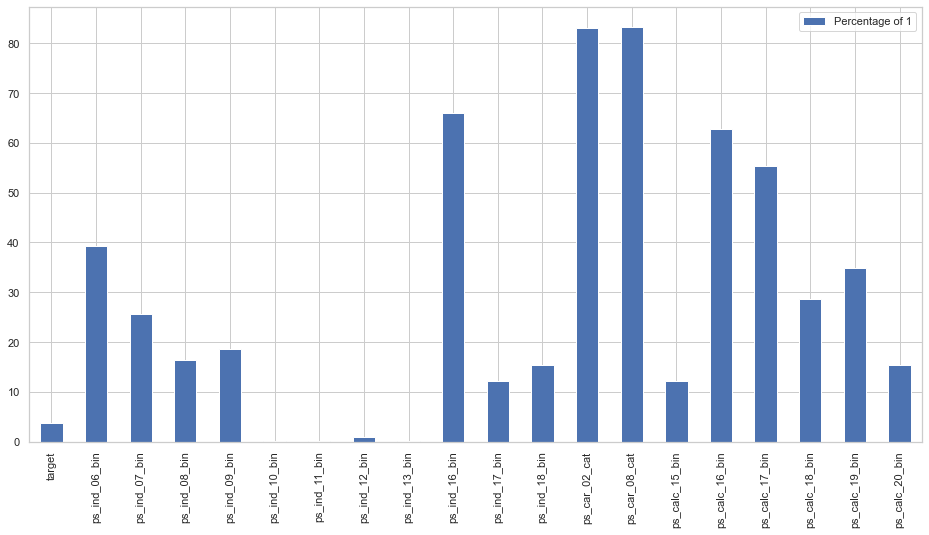

In [19]:
col = metadata_matrix_dataframe[metadata_matrix_dataframe['Unique_Values_Count'] == 2].index
df_1 = pd.DataFrame((df[col].sum()/df[col].shape[0])*100, columns=['Percentage of 1'])
df_1.plot.bar(figsize=(16,8));

Looking at above graph percentage of 1's is near for these features - *ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin.

#### 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance 

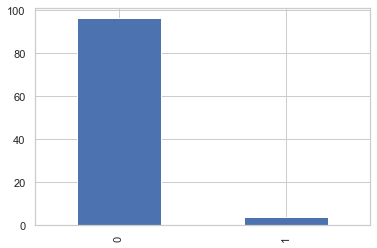

In [20]:
per.plot.bar();

We can see target distribution is highly inbalanced.

#### 9. What should be the preferred way in this case to balance the data?

The most popular solution to an imbalanced classification problem is to change the composition of the training dataset.Techniques designed to change the class distribution in the training dataset are generally referred to as sampling methods or resampling methods as we are sampling an existing data sample.
Note: We will resample the datframe when we will do modelling.

#Applying Resampling to make balance data-set

df_mino_upsampled = resample(df_mino,replace=True,n_samples=len(df_majo), random_state = 42)
df = pd.concat([df_majo,df_mino_upsampled])
print("Class compostion after resampling:")
print(df['target'].value_counts())
df['target'].value_counts().plot.bar();

Now here we have both class with equall count

#### 10. How many training records are there after achieving a balance of 12%?

In [21]:
# using resampling technique, splitting data into classes
df_mino= df[df['target']==1]
df_majo= df[df['target']==0]
df_mino_upsampled = resample(df_mino,replace=True,n_samples=int(len(df_majo)*0.12), random_state = 42)

print("Size of data, after achieving a balance of 12%: ", df_mino_upsampled.shape[0] + df_majo.shape[0])

Size of data, after achieving a balance of 12%:  642340


#### 11. Which are the top two features in terms of missing values?

In [22]:
print('The null values in each are:', df.isnull().sum())

The null values in each are: id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10 

There are no null values present in the dataset

#### 12. In total, how many features have missing values?

No Feature having missing values

#### 13. What steps should be taken to handle the missing data?

NA

#### 14. Which interval variables have strong correlation?

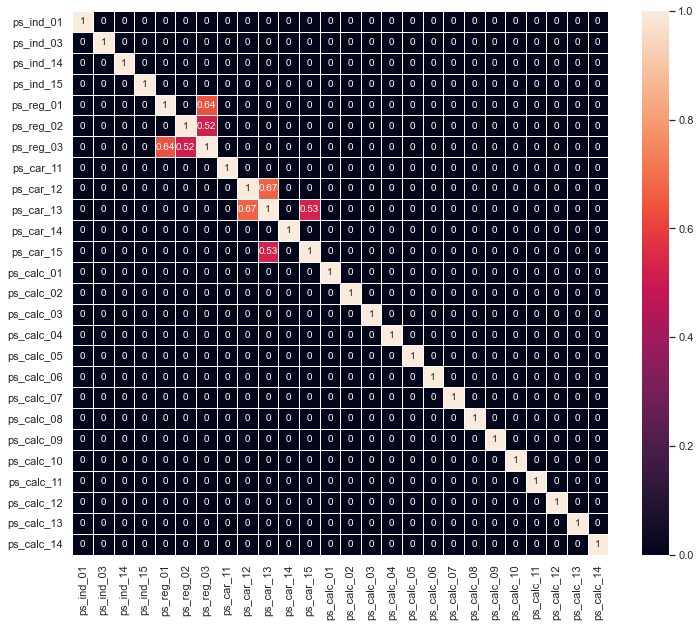

In [23]:
temp = df[interval_feature].corr()
temp = temp[(temp>=0.5) | (temp<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(temp,linewidths=.5,annot=True,ax=ax)
plt.show()

Interval Variable with high correlation(abs value more than 0.5)

ps_reg_03 --> ps_reg_03 & ps_reg_03

ps_reg_13 --> ps_reg_12

#### 15. What's the level of correlation among ordinal features?

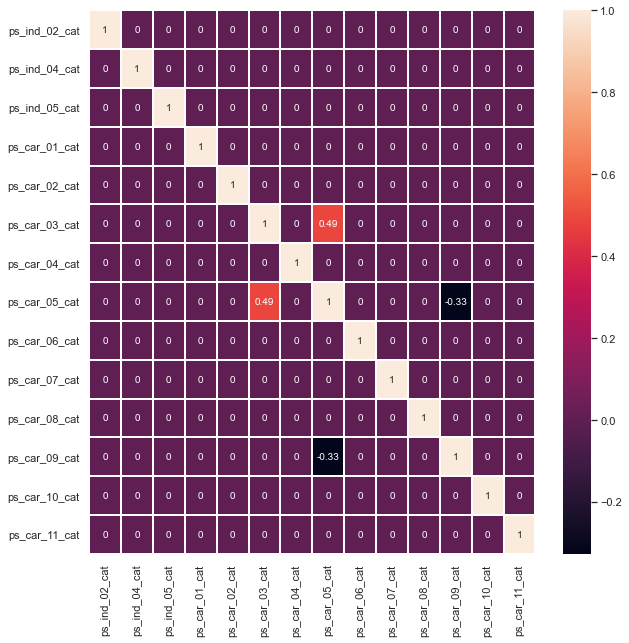

In [24]:
# cutoff = 0.3
temp = df[cat_feature].corr()
temp = temp[(temp>=0.3) | (temp<=-0.3)].fillna(0)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(temp,linewidths=.3, annot=True,ax=ax)
plt.show()

Ordinal Variable with high correlation(abs value more than 0.3)

ps_car_03_cat --> ps_car_05_cat

ps_car_05_cat --> ps_car_09_cat

#### 16. Implement Hot Encoding for categorical features

NA - No, nominal Features are available

#### 17. In nominal and interval features, which features are suitable for StandardScaler?

Nominal featues are not suitable for StandardScale

#### 18. Summarize the learnings of ED

Data is higly imblaced, target distribtion is:

0 = 96.36 %

1 = 3.64 %

 Most of the features are uncorrelated

Top 10 ordered important features
ps_car_13

ps_reg_03

ps_car_14

ps_calc_10

ps_calc_14

ps_calc_11

ps_car_11_cat

ps_ind_15

ps_ind_03

ps_calc_01

# Modeling :

In [25]:
#Spliting data in feature & target

x= df.drop(['target','id'], axis=1)
y= df['target']

In [26]:
#Spliting data in train test

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x, y, test_size = 0.3,random_state = 1)

## Logistic Regression (Before Resampling)

<AxesSubplot:>

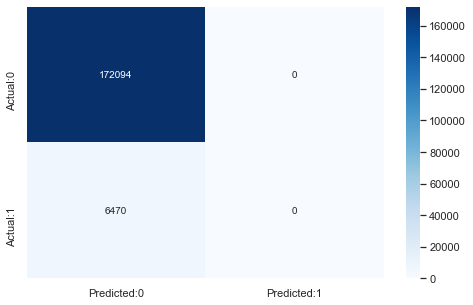

In [28]:


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# y_pred_train = log_reg.predict(X_Train)
y_pred_logreg1 = log_reg.predict(X_test)


#  Confusion Matrix


cm=confusion_matrix(y_test,y_pred_logreg1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

### 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print('\n CLASSIFICATION REPORT: \n',classification_report(y_test, y_pred_logreg1))


 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172094
           1       0.00      0.00      0.00      6470

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



When that data set is imbalanced - say it has 96% of instances in one class and only 4 % in the other - there is a great way to lower the cost. Predict that every instance belongs to the majority class, get accuracy of 96% which is very high accuracy.
When we use accuracy, we assign equal cost to false positives and false negatives.

### 2. Why do you think f1-score is 0.0?

In [30]:
print('F1 score: ', np.round(f1_score(y_test, y_pred_logreg1),3))

F1 score:  0.0


In this model, the Precision and Recall both are Zero due to which F1 score also become zero. 
The F1-score of a classification model is calculated as follows:

       F1 score = 2(P*R)/P+R
       
where, 
P = Precision &
R = Recall


### 3. What is the precision and recall score for the model?

In [31]:

print('PRECISION:' ,round(metrics.precision_score(y_test, y_pred_logreg1), 3))  # Precision
print('RECALL ', round(metrics.recall_score(y_test, y_pred_logreg1), 3))        # Recall

PRECISION: 0.0
RECALL  0.0


In this model, the Precision and Recall both are Zero

### 4. What is the most important inference you can draw from the result?

Simple Logistic Regression Model seems to have high accuracy because of highly imbalanced data.

## Logistic Regression (After Resampling)

Class compostion after resampling:
0    573518
1    573518
Name: target, dtype: int64


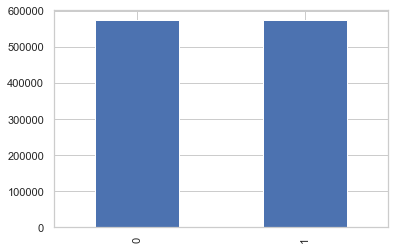

In [32]:
#Features Scaling

df_mino_upsampled = resample(df_mino,replace=True,n_samples=len(df_majo), random_state = 42) #Applying Resampling to make balance data-set
df = pd.concat([df_majo,df_mino_upsampled])
print("Class compostion after resampling:")
print(df['target'].value_counts())
df['target'].value_counts().plot.bar();

Now here we have both class with equal count

In [33]:
#Spliting data in feature & target

x= df.drop(['target','id'], axis=1)
y_improved= df['target']  # After making "target" variable balanced with equal distribution, we assigned the value to y_improved

In [34]:
#Spliting data in train test

from sklearn.model_selection import train_test_split as tts
X_Train,X_Test,y_Train,y_Test = tts(x, y_improved, test_size = 0.3,random_state = 1)

In [35]:
#Features Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_Train)
# Now apply the transformations to the data:
X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)

<AxesSubplot:>

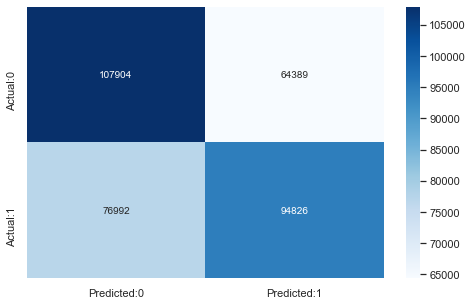

In [37]:
#Logistic Reggression after Resampling

log_reg = LogisticRegression()
log_reg.fit(X_Train, y_Train)

# y_pred_train = log_reg.predict(X_Train)
y_pred_logreg2 = log_reg.predict(X_Test)


#  Confusion Matrix

cm=confusion_matrix(y_Test,y_pred_logreg2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

### 5. What is the accuracy score and f1-score for the improved Logistic Regression model?

In [38]:
# Accuracy & F1-Score

print('\n CLASSIFICATION REPORT: \n',classification_report(y_Test, y_pred_logreg2))  


 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60    172293
           1       0.60      0.55      0.57    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.59    344111
weighted avg       0.59      0.59      0.59    344111



We can see after resampling, we have below Accuracy & F1 score value.

Accuracy = 0.589

F1 score = 0.573

### 6. Why do you think f1-score has improved?

The F1-score is a measure of a model's performance in terms of precision and recall. It is commonly used in binary classification problems, such as predicting whether a customer will file an insurance claim or not. There are multiple way to deal with imbalanced data. Each learner you have applied have its own "trick" for it. However, a general thing you can try is to resample the 1s samples. That is, artificially increase the proportion of the 1s in your dataset. Previously datset is highly imbalanced for target distribution. Once dataset is balanced, we can see both Accuracy & F1-Score improved or increased.

Logistic regression model (Before Resampling)

Accuracy = 0.964

F1 score = 0.0

Logistic regression model (After Resampling)

Accuracy = 0.589

F1 score = 0.573

In above given data after resampling the F1 score is 0.573 which is improved F1 score in compare to previous score and it shows improved logistic regression model.



# Support Vector Classifier

In [ ]:
x_tr=X_Train[:1000000,:]
y_tr=y_Train[:1000000]

## 1. svm Classifier with linear kernel

#Create a svm Classifier
clf = svm.SVC(kernel='linear')
# FIT SVC ON TRAINING DATA
clf.fit(x_tr, y_tr)

## 2. Predicting on Train and test data

# y_pred_train = clf.predict(X_train)
y_pred_svc = clf.predict(X_Test)



In [42]:
#  Confusion Matrix

cm=confusion_matrix(y_Test, y_pred_svc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

# Accuracy & F1-Score
print('\n CLASSIFICATION REPORT: \n',classification_report(y_Test, y_pred_svc))  


 CONFUSION MATRIX:
  [[111423  60870]
 [ 81580  90238]] 


 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.65      0.61    172293
           1       0.60      0.53      0.56    171818

    accuracy                           0.59    344111
   macro avg       0.59      0.59      0.58    344111
weighted avg       0.59      0.59      0.58    344111



### 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement

Not any Significance Improvement

### 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?

I fitted the SVC model on 10K dataset because on 100K dataset not able to run the model.

# XGBoost Classifier

In [43]:
## 1. Initializing XGboost Classifier

xg_cls = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 100)
xg_cls.fit(X_Train, y_Train)

## 2. Predicting on Train and test data

# y_pred_train = xg_cls.predict(X_train)
y_pred_xgb = xg_cls.predict(X_Test)



[22:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
#  Confusion Matrix

cm=confusion_matrix(y_Test, y_pred_xgb)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

# Accuracy & F1-Score
print('\n CLASSIFICATION REPORT: \n',classification_report(y_Test, y_pred_xgb))  


 CONFUSION MATRIX:
  [[171743    550]
 [     0 171818]] 


 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    172293
           1       1.00      1.00      1.00    171818

    accuracy                           1.00    344111
   macro avg       1.00      1.00      1.00    344111
weighted avg       1.00      1.00      1.00    344111



### 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

In my model ,I'm getting f1 score near to 1, that indicate a best fitted model.

### 10. What is the increase in number of features after one-hot encoding of the data?

There is no need of One-hot encoding because it has been previously done.

### 11. Is there any improvement in scores after encoding?

Not happened (because There is no need of One-hot encoding so I have not done it)

### 12. If not missing a positive sample is the priority which model is best so far?

XGBoost model is performing best.Count of missing positive sample is 6 only.

### 13. If not marking negative sample as positive is top priority, which model is best so far?

XGBoost model is performing best. No misclassification for negative sample as positive.

# Adaboost classifier

In [47]:
# Create adaboost classifer object
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = adaBoost.fit(X_Train, y_Train)


#Predict the response for test dataset
y_pred_ada = model1.predict(X_Test)

In [48]:
#  Confusion Matrix

cm=confusion_matrix(y_Test, y_pred_ada)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

# Accuracy & F1-Score
print('\n CLASSIFICATION REPORT: \n',classification_report(y_Test, y_pred_ada)) 


 CONFUSION MATRIX:
  [[106594  65699]
 [ 72948  98870]] 


 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.61    172293
           1       0.60      0.58      0.59    171818

    accuracy                           0.60    344111
   macro avg       0.60      0.60      0.60    344111
weighted avg       0.60      0.60      0.60    344111



### 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

No improvement in AdaBoost model result because In my case XGBoost model giving much more better result (Accuracy and F1 score) in compare to AdaBoost model.

# MLP Classifier

In [49]:
# Training the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_Train, y_Train.values.ravel())

# Prediction on x_test
y_predic = mlp.predict(X_Test)

In [50]:
#  Confusion Matrix

cm=confusion_matrix(y_Test, y_predic)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

# Accuracy & F1-Score
print('\n CLASSIFICATION REPORT: \n',classification_report(y_Test, y_predic)) 


 CONFUSION MATRIX:
  [[101598  70695]
 [ 64479 107339]] 


 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.61      0.59      0.60    172293
           1       0.60      0.62      0.61    171818

    accuracy                           0.61    344111
   macro avg       0.61      0.61      0.61    344111
weighted avg       0.61      0.61      0.61    344111



### 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

### 16. At what layer size we get the best f1-score?

In Generally, you can't analytically calculate the number of layers or the number of nodes to use per layer in an ANN to address a specific real-world predictive modeling problem, But there are many methods for determining the correct number of neurons to use in the hidden layers, such as the following:
The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The no. of hidden neurons should be less than twice the size of the input layer.

# Final Result Comperison

In [54]:
data = {'Log_Reg(Before Resamp)':[np.round(f1_score(y_test, y_pred_logreg1),3), np.round(metrics.accuracy_score(y_test, y_pred_logreg1),3)],
        'Log_Reg(After Resamp)':[np.round(f1_score(y_Test, y_pred_logreg2),3), np.round(metrics.accuracy_score(y_Test, y_pred_logreg2),3)],
        'SVC':[np.round(f1_score(y_Test, y_pred_svc),3), np.round(metrics.accuracy_score(y_Test, y_pred_svc),3)],
        'XGBoost':[np.round(f1_score(y_Test, y_pred_xgb),3), np.round(metrics.accuracy_score(y_Test, y_pred_xgb),3)],
        'AdaBoost':[np.round(f1_score(y_Test, y_pred_ada),3), np.round(metrics.accuracy_score(y_Test, y_pred_ada),3)],
        'MLP Classifier':[np.round(f1_score(y_Test, y_predic),3), np.round(metrics.accuracy_score(y_Test, y_predic),3)]}

df_result=pd.DataFrame(data, index = ['F1_score', 'Accuracy']).T
df_result

,F1_score,Accuracy
Log_Reg(Before Resamp),0.00,0.96
Log_Reg(After Resamp),0.57,0.59
SVC,0.56,0.59
XGBoost,1.00,1.00
AdaBoost,0.59,0.60
MLP Classifier,0.61,0.61


## After comparing the F1- score and Accuracy of all used Machine Learning models, we found that XGBoost model is best performing and giving best result with respect to all other model.